1 - Monalisa bonus :


1- 1 / Tester avec un modèle de base conçu


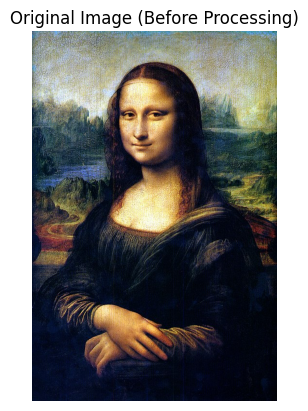

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 1.4001


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - accuracy: 1.0000 - loss: 0.6051
Loss: 0.6050664782524109, Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Predicted emotion: angry


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the pre-trained model
model = load_model('emotion_detection_model.h5')

# Load the image
img_path = 'img/monalisa.jpg'
img = image.load_img(img_path)  # Load the image without resizing or grayscale conversion

# Display the original image before processing
plt.imshow(img)
plt.title("Original Image (Before Processing)")
plt.axis("off")
plt.show()

# Preprocess the image for the model
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Resize and convert to grayscale
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Assuming you have a label for the image
label = np.array([0])  # Replace with the correct label for your image

# Compile the model (if not already compiled)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the single image
model.fit(img_array, label, epochs=1)

# Evaluate the model on the same image
loss, accuracy = model.evaluate(img_array, label)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Make a prediction on the image
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Assuming you have a list of emotions
emotions = ['angry', 'happy', 'sad', 'neutral', 'fear', 'surprise', 'disgust']  # Replace with your actual emotions list
print(f"Predicted emotion: {emotions[predicted_class]}")

1-2 / tester avec un modèle pré-entrainé

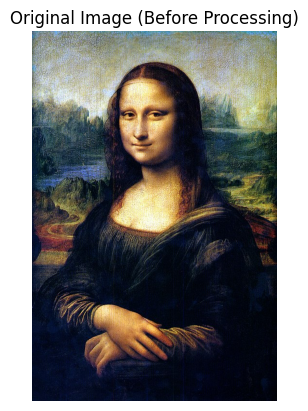

5
Predicted emotion: Surprise


In [8]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch

# load model
model_name = "trpakov/vit-face-expression"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Load the image
img_path = 'img/monalisa.jpg'
img = image.load_img(img_path)

# Display the original image before processing
plt.imshow(img)
plt.title("Original Image (Before Processing)")
plt.axis("off")
plt.show()

inputs = feature_extractor(images=img, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

predicted_class = torch.argmax(logits, dim=1).item()
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
predicted_emotion = emotions[predicted_class]
print(predicted_class)
print(f"Predicted emotion: {predicted_emotion}")



1-3/ Tester avec un modèle avancé: librairie DeepFace basée sur le model préentrainé EMO-Affectnet model

In [9]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=d8ff0d950b2c0c0656a88be1753265dcf0376bb01560223cbf9b53aede103d63
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


25-03-13 19:23:34 - Directory /root/.deepface has been created
25-03-13 19:23:34 - Directory /root/.deepface/weights has been created


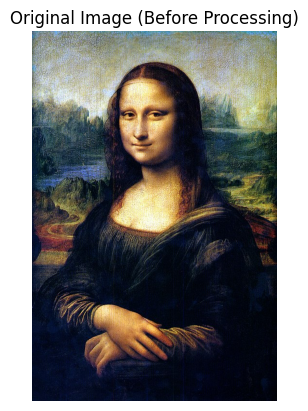

25-03-13 19:23:35 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 83.5MB/s]


Dominant Emotion: neutral
Emotion Scores:
angry: 0.05246558575890958
disgust: 5.390572987984399e-08
fear: 0.22097043693065643
happy: 0.3962839487940073
sad: 40.21832346916199
surprise: 0.00012017367225780617
neutral: 59.111833572387695


In [10]:
from deepface import DeepFace
import cv2

# Load an image
image_path = 'img/monalisa.jpg'
img = image.load_img(img_path)  #

# Display the original image before processing
plt.imshow(img)
plt.title("Original Image (Before Processing)")
plt.axis("off")
plt.show()

# Analyze the image for emotions
try:
    # Use DeepFace to analyze the image
    result = DeepFace.analyze(img_path=image_path, actions=['emotion'])

    # Extract the dominant emotion
    dominant_emotion = result[0]['dominant_emotion']
    emotion_scores = result[0]['emotion']

    # Print the results
    print(f"Dominant Emotion: {dominant_emotion}")
    print("Emotion Scores:")
    for emotion, score in emotion_scores.items():
        print(f"{emotion}: {score}")

except Exception as e:
    print(f"Error: {e}")